## Polytope time series

First, we retrieve ENS time series data using polytope.

In [1]:
import earthkit.data

# lat, lon
location = [38.78655345978706, -9.109280931080349]

request = {
    "class": "od",
    "stream" : "enfo",
    "type" : "pf",
    "date" : -1,
    "time" : "0000",
    "levtype" : "sfc",
    "expver" : 1, 
    "domain" : "g",
    "param" : "164/167/169",
    "number" : "1/to/50",
    "step": "0/to/360",
    "feature" : {
        "type" : "timeseries",
        "points": [location],
        "axes": "step",
    },
}

ds = earthkit.data.from_source("polytope", "ecmwf-mars", request, stream=False, address='polytope.ecmwf.int')

2024-12-18 09:11:07 - INFO - Key read from /Users/cgr/.polytopeapirc
2024-12-18 09:11:07 - INFO - Sending request...
{'request': 'class: od\n'
            'date: -1\n'
            'domain: g\n'
            'expver: 1\n'
            'feature:\n'
            '  axes: step\n'
            '  points:\n'
            '  - - 38.78655345978706\n'
            '    - -9.109280931080349\n'
            '  type: timeseries\n'
            'levtype: sfc\n'
            'number: 1/to/50\n'
            'param: 164/167/169\n'
            'step: 0/to/360\n'
            'stream: enfo\n'
            "time: '0000'\n"
            'type: pf\n',
 'verb': 'retrieve'}
2024-12-18 09:11:07 - INFO - Polytope user key found in session cache for user cgr
2024-12-18 09:11:07 - INFO - Request accepted. Please poll ./96d99675-364f-45cb-b3f4-e834db746625 for status
2024-12-18 09:11:07 - INFO - Polytope user key found in session cache for user cgr
2024-12-18 09:11:07 - INFO - Checking request status (./96d99675-364f-45cb-b3

96d99675-364f-45cb-b3f4-e834db746625.covjson:   0%|          | 0.00/520k [00:00<?, ?B/s]

The retrieved CoverageJSON data can be converted Xarray.

In [2]:
da = ds.to_xarray()
da

<xarray.Dataset> Size: 176kB
Dimensions:   (x: 1, y: 1, z: 1, number: 50, datetime: 1, t: 145)
Coordinates:
  * x         (x) float64 8B 38.77
  * y         (y) float64 8B 350.9
  * z         (z) int64 8B 0
  * number    (number) int64 400B 1 2 3 4 5 6 7 8 9 ... 43 44 45 46 47 48 49 50
  * datetime  (datetime) <U20 80B '2024-12-17T00:00:00Z'
  * t         (t) datetime64[ns] 1kB 2024-12-17 ... 2025-01-01
Data variables:
    tcc       (x, y, z, number, datetime, t) float64 58kB 1.0 0.9854 ... 0.999
    2t        (x, y, z, number, datetime, t) float64 58kB 286.7 285.8 ... 286.3
    ssrd      (x, y, z, number, datetime, t) float64 58kB 0.0 0.0 ... 1.304e+08
Attributes:
    class:          od
    Forecast date:  2024-12-17T00:00:00Z
    domain:         g
    expver:         0001
    levtype:        sfc
    number:         1
    stream:         enfo
    type:           pf

We can directly plot the retrieved data as an ENS meteogram with earthkit-plots.

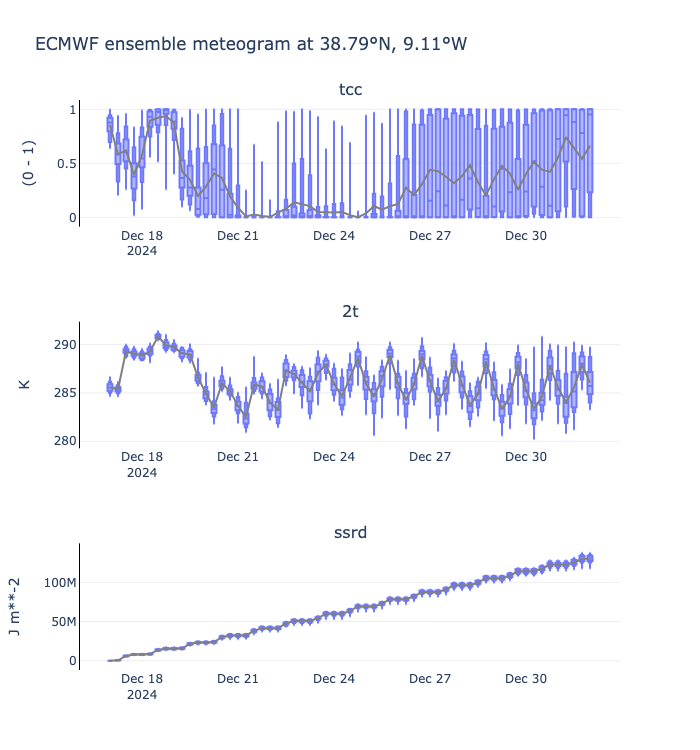

In [3]:
from earthkit.plots.interactive import Chart

def location_to_string(location):
    """
    Converts latitude and longitude to a string representation with degrees
    and N/S/E/W.
    """
    (lat, lon) = location
    lat_dir = "N" if lat >= 0 else "S"
    lon_dir = "E" if lon >= 0 else "W"
    return f"{abs(lat):.2f}°{lat_dir}, {abs(lon):.2f}°{lon_dir}"

TIME_FREQUENCY = "6h"
QUANTILES = [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1]

chart = Chart()
chart.title(f"ECMWF ensemble meteogram at {location_to_string(location)}")
chart.box(ds, time_frequency=TIME_FREQUENCY, quantiles=QUANTILES)
chart.line(ds,aggregation='mean', line_color='grey', time_frequency=TIME_FREQUENCY)
chart.show(renderer="png")  # Replace with chart.show() in an interactive session!